In [15]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data.describe()

,userID,n_clicks,n_queries,n_nonclk_queries
count,566134.000000,566134.000000,566134.000000,566134.000000
mean,301377.214027,11.431658,10.720524,4.703987
std,175526.333101,20.251494,16.262827,8.109958
min,1.000000,0.000000,1.000000,0.000000
25%,148627.250000,1.000000,2.000000,1.000000
50%,299362.500000,4.000000,5.000000,2.000000
75%,455698.750000,13.000000,13.000000,6.000000
max,603137.000000,863.000000,665.000000,581.000000


In [5]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
exp = data[data.slot=='exp']
print len(exp)
control = data[data.slot=='control']
print len(control)

281580
284554


In [11]:
(sum(exp.n_clicks)*1./sum(control.n_clicks)-1)*100

1.6135689824415822

In [13]:
exp_mean = np.mean(exp.n_clicks)
exp_med = np.median(exp.n_clicks)
print "EXP: mean = %.4f; median = %.4f" % (exp_mean, exp_med)
c_mean = np.mean(control.n_clicks)
c_med = np.median(control.n_clicks)
print "CONTROL: mean = %.4f; median = %.4f" % (c_mean, c_med)

EXP: mean = 11.5840; median = 5.0000
CONTROL: mean = 11.2809; median = 4.0000


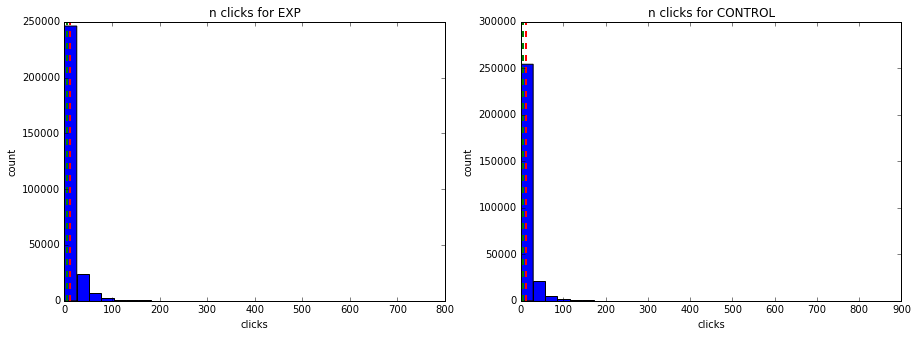

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(exp.n_clicks, bins=30)
plt.axvline(exp_mean, color='r', linestyle='dashed', linewidth=2)
plt.axvline(exp_med, color='g', linestyle='dashed', linewidth=2)
plt.xlabel("clicks")
plt.ylabel("count")
plt.title("n clicks for EXP")

plt.subplot(1,2,2)
plt.hist(control.n_clicks, bins=30)
plt.xlabel("clicks")
plt.ylabel("count")
plt.title("n clicks for CONTROL")
plt.axvline(c_mean, color='r', linestyle='dashed', linewidth=2)
plt.axvline(c_med, color='g', linestyle='dashed', linewidth=2)

plt.show()

In [19]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [21]:
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [28]:
print np.array(exp.n_clicks.values)

[23  3 29 ...,  4  4  3]


In [29]:
np.random.seed(123)

exp_n_clicks = np.array(exp.n_clicks.values)
c_n_clicks = np.array(control.n_clicks.values)

exp_median_scores = np.median(get_bootstrap_samples(exp_n_clicks, 500), axis=1)
c_median_scores = np.median(get_bootstrap_samples(c_n_clicks, 500), axis=1)

print "95% confidence interval for Exp group:",  stat_intervals(exp_median_scores)
print "95% confidence interval for Control group:",  stat_intervals(c_median_scores)

95% confidence interval for Exp group: [ 5.  5.]
95% confidence interval for Control group: [ 4.  4.]


In [30]:
median_scores = map(lambda x: x[0] - x[1], zip(exp_median_scores, c_median_scores))
print ("95% confidence interval for difference median:",  stat_intervals(median_scores))

('95% confidence interval for difference median:', array([ 1.,  1.]))


In [31]:
np.random.seed(123)

exp_mean_scores = np.mean(get_bootstrap_samples(exp_n_clicks, 500), axis=1)
c_mean_scores = np.mean(get_bootstrap_samples(c_n_clicks, 500), axis=1)

print "95% confidence interval for Exp group:",  stat_intervals(exp_mean_scores)
print "95% confidence interval for Control group:",  stat_intervals(c_mean_scores)

95% confidence interval for Exp group: [ 11.51651342  11.66053004]
95% confidence interval for Control group: [ 11.20560816  11.35528713]


In [32]:
mean_scores = map(lambda x: x[0] - x[1], zip(exp_mean_scores, c_mean_scores))
print ("95% confidence interval for difference mean:",  stat_intervals(mean_scores))

('95% confidence interval for difference mean:', array([ 0.20274804,  0.40479205]))


In [33]:
np.random.seed(0)
n_boot_samples = 500

c_samples = get_bootstrap_samples(c_n_clicks, n_boot_samples)

In [43]:
print len(c_samples[1])

284554


In [59]:
control_boot_mean = np.mean(c_samples, axis=1)
control_boot_chi_squared = np.var(c_samples,axis=1) #np.power(c_samples-np.reshape(np.repeat(np.sum(c_samples,axis=1),284554),(500,284554)),2), axis=1)

In [60]:
control_boot_chi_squared.shape

(500,)

In [61]:
import scipy

((array([ 409.75447609,  417.6076492 ,  422.06789456,  425.24996033,
          427.75458277,  429.83540071,  431.6244473 ,  433.19958802,
          434.61075771,  435.89197548,  437.06750372,  438.15527962,
          439.16895419,  440.11916758,  441.0143809 ,  441.86143812,
          442.66595697,  443.43260794,  444.16531782,  444.86742108,
          445.54177438,  446.19084464,  446.81677748,  447.42145127,
          448.00652022,  448.57344901,  449.12354099,  449.6579613 ,
          450.17775596,  450.68386771,  451.17714938,  451.65837504,
          452.12824958,  452.58741674,  453.03646615,  453.47593922,
          453.90633437,  454.32811152,  454.74169597,  455.14748186,
          455.54583518,  455.93709642,  456.3215829 ,  456.69959087,
          457.07139736,  457.43726183,  457.79742761,  458.1521233 ,
          458.50156388,  458.84595184,  459.1854781 ,  459.52032292,
          459.85065667,  460.17664058,  460.49842735,  460.81616179,
          461.12998133,  461.44001

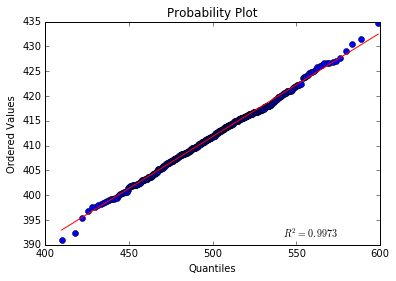

In [62]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", sparams=(500-1), plot=plt)

((array([ -2.99209858e+00,  -2.71015927e+00,  -2.55162541e+00,
          -2.43921385e+00,  -2.35113311e+00,  -2.27822091e+00,
          -2.21572267e+00,  -2.16084152e+00,  -2.11178767e+00,
          -2.06734403e+00,  -2.02664403e+00,  -1.98904794e+00,
          -1.95406954e+00,  -1.92133033e+00,  -1.89052965e+00,
          -1.86142459e+00,  -1.83381593e+00,  -1.80753820e+00,
          -1.78245240e+00,  -1.75844061e+00,  -1.73540186e+00,
          -1.71324904e+00,  -1.69190643e+00,  -1.67130780e+00,
          -1.65139483e+00,  -1.63211595e+00,  -1.61342528e+00,
          -1.59528183e+00,  -1.57764883e+00,  -1.56049314e+00,
          -1.54378481e+00,  -1.52749667e+00,  -1.51160399e+00,
          -1.49608418e+00,  -1.48091659e+00,  -1.46608224e+00,
          -1.45156367e+00,  -1.43734479e+00,  -1.42341071e+00,
          -1.40974764e+00,  -1.39634279e+00,  -1.38318426e+00,
          -1.37026095e+00,  -1.35756253e+00,  -1.34507932e+00,
          -1.33280226e+00,  -1.32072287e+00,  -1.308833

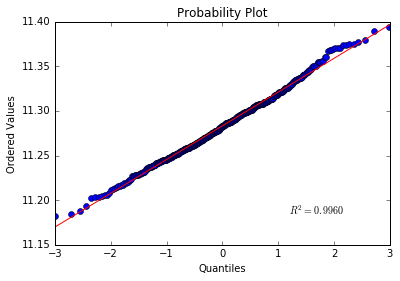

In [54]:
scipy.stats.probplot(control_boot_mean, plot=plt)

In [64]:
n_click_control_by_user = data[data['slot']=='control'].groupby(by='userID')['n_clicks'].agg(np.sum)

In [65]:
n_click_exp_by_user = data[data['slot']=='exp'].groupby(by='userID')['n_clicks'].agg(np.sum)

In [67]:
n_click_control_by_user.describe()

count    284392.000000
mean         11.287332
std          20.289501
min           0.000000
25%           1.000000
50%           4.000000
75%          13.000000
max         863.000000
Name: n_clicks, dtype: float64

In [68]:
n_click_exp_by_user.describe()

count    281450.000000
mean         11.589352
std          20.225421
min           0.000000
25%           1.000000
50%           5.000000
75%          13.000000
max         776.000000
Name: n_clicks, dtype: float64

In [69]:
stats.mannwhitneyu(n_click_exp_by_user, n_click_control_by_user)

MannwhitneyuResult(statistic=41140868471.0, pvalue=3.1266857702625713e-74)

In [71]:
browsers = data.browser.unique()
print browsers

['Browser #2' 'Browser #4' 'Browser #14' 'Browser #17' 'Browser #20'
 'Browser #22']


In [73]:
pvals = []
for b in browsers:
    e = exp[exp.browser==b]
    c = control[control.browser==b]
    pval = stats.mannwhitneyu(e.n_clicks, c.n_clicks).pvalue
    pvals.append(pval)
    
print pvals

[0.055799789937236381, 0.81556888807591688, 0.0, 0.075379905635521299, 0.90754133162630202, 0.51616652908421157]


In [74]:
import statsmodels.stats.multitest as smm

In [77]:
rej, pval_corr = smm.multipletests(pvals, alpha=0.05/6, method='holm')[:2]

In [78]:
print rej, pval_corr

[False False  True False False False] [ 0.27899895  1.          0.          0.30151962  1.          1.        ]


In [79]:
exp_perc = []
c_perc = []
for b in browsers:
    e = exp[exp.browser==b]
    c = control[control.browser==b]
    perc_e = np.sum(e.n_nonclk_queries)*1./np.sum(e.n_queries)
    perc_c = np.sum(c.n_nonclk_queries)*1./np.sum(c.n_queries)
    exp_perc.append(perc_e)
    c_perc.append(perc_c)
    
print exp_perc
print c_perc

[0.449827469485547, 0.4514294190358467, 0.4375561736127329, 0.3693741284866483, 0.3897737648371716, 0.3985394721969546]
[0.4596274717919465, 0.4697092963514274, 0.5759041136008114, 0.36299366746282086, 0.4054048474338329, 0.40593976593513353]
